In [2]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import requests

req = requests.get('https://vaz.io/tesla') # whole html

# get all tables from html
soup = BeautifulSoup(req.text)
all_tables = soup.find_all("table")
len(all_tables)


6

In [9]:
# we can't read the format of all_tables[1]text
# find the table with quarterly
table_number = 0

for table in all_tables:
    if 'Quarterly' in table.text:
        print("It is in", table_number)
        quarterly_number = table_number
    else: 
        print("it is NOT in", table_number)
    table_number = table_number + 1


it is NOT in 0
It is in 1
it is NOT in 2
it is NOT in 3
it is NOT in 4
it is NOT in 5


In [10]:
quarterly_number

1

In [11]:
quarterly_table = all_tables[quarterly_number]

quarterly_rows = quarterly_table.findAll('tr')
len(quarterly_rows)

60

In [15]:
print(quarterly_rows)

[<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>, <tr>
<td style="text-align:center">2023-12-31</td>
<td style="text-align:center">$25,167</td>
</tr>, <tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>, <tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>, <tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329</td>
</tr>, <tr>
<td style="text-align:center">2022-12-31</td>
<td style="text-align:center">$24,318</td>
</tr>, <tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>, <tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>, <tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>, <tr>
<td style="text-align:center">2021-12-31</t

In [22]:
# store data in the dataframe
new_table = []

# find alla data from the rows

for row in quarterly_rows:
    tds = row.findAll('td')
    if len(tds) == 2: # 2 is the numbers of the tds in the row. The first row for example is empty, we do not want it
        # print cell content , first the date one and then the dollar one (0 is index from tds and not from the rows! 0, 1 are index within the tds 2 elements)
       # print(tds[0].text, tds[1].text) 
        if tds[1].text != '':
        # print(tds[0].text, float(tds[1].text.replace('$', '').replace(',', '.')))
            row_date = tds[0].text
            row_value = float(tds[1].text.replace('$', '').replace(',', '')) # cleaned and converted to number
            new_table.append([row_date, row_value])
    

print(new_table)



[['2023-12-31', 25167.0], ['2023-09-30', 23350.0], ['2023-06-30', 24927.0], ['2023-03-31', 23329.0], ['2022-12-31', 24318.0], ['2022-09-30', 21454.0], ['2022-06-30', 16934.0], ['2022-03-31', 18756.0], ['2021-12-31', 17719.0], ['2021-09-30', 13757.0], ['2021-06-30', 11958.0], ['2021-03-31', 10389.0], ['2020-12-31', 10744.0], ['2020-09-30', 8771.0], ['2020-06-30', 6036.0], ['2020-03-31', 5985.0], ['2019-12-31', 7384.0], ['2019-09-30', 6303.0], ['2019-06-30', 6350.0], ['2019-03-31', 4541.0], ['2018-12-31', 7226.0], ['2018-09-30', 6824.0], ['2018-06-30', 4002.0], ['2018-03-31', 3409.0], ['2017-12-31', 3288.0], ['2017-09-30', 2985.0], ['2017-06-30', 2790.0], ['2017-03-31', 2696.0], ['2016-12-31', 2285.0], ['2016-09-30', 2298.0], ['2016-06-30', 1270.0], ['2016-03-31', 1147.0], ['2015-12-31', 1214.0], ['2015-09-30', 937.0], ['2015-06-30', 955.0], ['2015-03-31', 940.0], ['2014-12-31', 957.0], ['2014-09-30', 852.0], ['2014-06-30', 769.0], ['2014-03-31', 621.0], ['2013-12-31', 615.0], ['2013-09-

In [23]:
# just example of replace
number_ex = '$25,1'
real_number = float(number_ex.replace('$', '').replace(',', '.'))
print(real_number)

25.1


<Axes: >

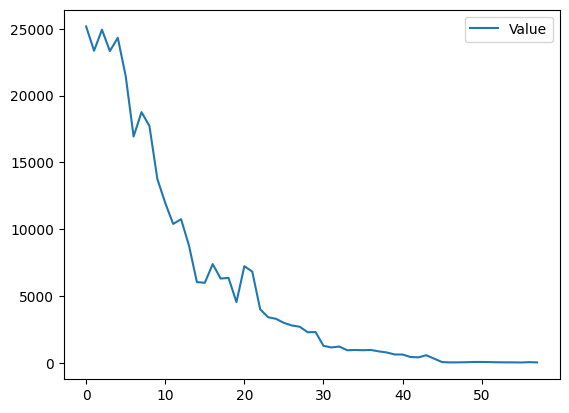

In [24]:
df_table = pd.DataFrame(new_table)
df_table.columns = ["Date", "Value"]
df_table.plot()

In [25]:
df_table

,Date,Value
0,2023-12-31,25167.0
1,2023-09-30,23350.0
2,2023-06-30,24927.0
3,2023-03-31,23329.0
4,2022-12-31,24318.0
5,2022-09-30,21454.0
6,2022-06-30,16934.0
7,2022-03-31,18756.0
8,2021-12-31,17719.0
9,2021-09-30,13757.0


In [26]:
df_table.info()
# datatype of date is "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    58 non-null     object 
 1   Value   58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [28]:
import sqlite3

connection = sqlite3.connect("Tesla_quarterly.db")
connection

In [29]:
cursor = connection.cursor() # cursor is going to execute the sql commands in the database (create tables, insert tables in database)
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [32]:
# add data from dataframe in table, take name of created table "revenue"

df_table.to_sql("revenue", connection, if_exists = "replace", index = False)
connection.commit() # commit to database

# if_exists : if table already exists, it is going to replace the data and not give an error

In [34]:
query = "SELECT * FROM revenue"
for row in connection.execute(query):
    print(row)

('2023-12-31', 25167.0)
('2023-09-30', 23350.0)
('2023-06-30', 24927.0)
('2023-03-31', 23329.0)
('2022-12-31', 24318.0)
('2022-09-30', 21454.0)
('2022-06-30', 16934.0)
('2022-03-31', 18756.0)
('2021-12-31', 17719.0)
('2021-09-30', 13757.0)
('2021-06-30', 11958.0)
('2021-03-31', 10389.0)
('2020-12-31', 10744.0)
('2020-09-30', 8771.0)
('2020-06-30', 6036.0)
('2020-03-31', 5985.0)
('2019-12-31', 7384.0)
('2019-09-30', 6303.0)
('2019-06-30', 6350.0)
('2019-03-31', 4541.0)
('2018-12-31', 7226.0)
('2018-09-30', 6824.0)
('2018-06-30', 4002.0)
('2018-03-31', 3409.0)
('2017-12-31', 3288.0)
('2017-09-30', 2985.0)
('2017-06-30', 2790.0)
('2017-03-31', 2696.0)
('2016-12-31', 2285.0)
('2016-09-30', 2298.0)
('2016-06-30', 1270.0)
('2016-03-31', 1147.0)
('2015-12-31', 1214.0)
('2015-09-30', 937.0)
('2015-06-30', 955.0)
('2015-03-31', 940.0)
('2014-12-31', 957.0)
('2014-09-30', 852.0)
('2014-06-30', 769.0)
('2014-03-31', 621.0)
('2013-12-31', 615.0)
('2013-09-30', 431.0)
('2013-06-30', 405.0)
('2013-0

In [39]:
# Plot charts

# Parse date to datetime type, because pandas does not recognise the object date as date and for example we would not be able to compare two periods
df_table["Date"] = pd.to_datetime(df_table["Date"], format="%Y-%m-%d")

In [40]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    58 non-null     datetime64[ns]
 1   Value   58 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


<Axes: xlabel='Date', ylabel='Value'>

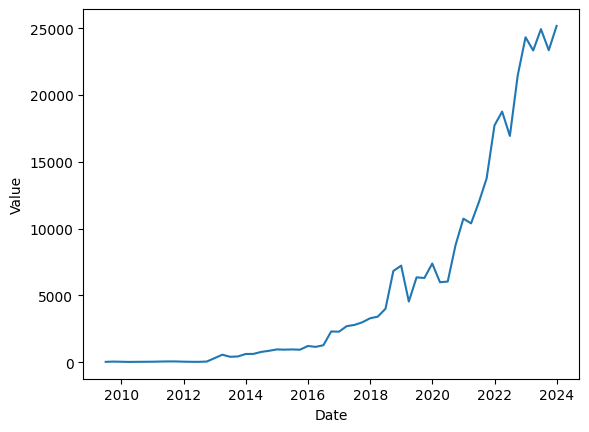

In [44]:
import seaborn as sns

sns.lineplot(x = "Date", y = "Value", data = df_table)

In [47]:
# sns.barplot(x = "Date", y = "Value", data = df_table) -> date needs to be grouped by year, otherwise we have one bar for each row of dataframe and it becomes untidy
grouped_revenue = df_table.groupby(df_table["Date"].dt.year)["Value"].sum()
print(grouped_revenue)

Date
2009       73.0
2010      116.0
2011      204.0
2012      413.0
2013     2013.0
2014     3199.0
2015     4046.0
2016     7000.0
2017    11759.0
2018    21461.0
2019    24578.0
2020    31536.0
2021    53823.0
2022    81462.0
2023    96773.0
Name: Value, dtype: float64


<Axes: xlabel='Date', ylabel='Value'>

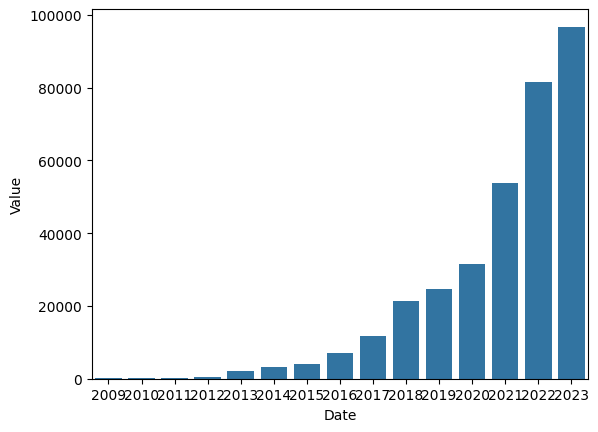

In [48]:
sns.barplot(grouped_revenue) #dates still close to each other

<Axes: xlabel='Date', ylabel='Value'>

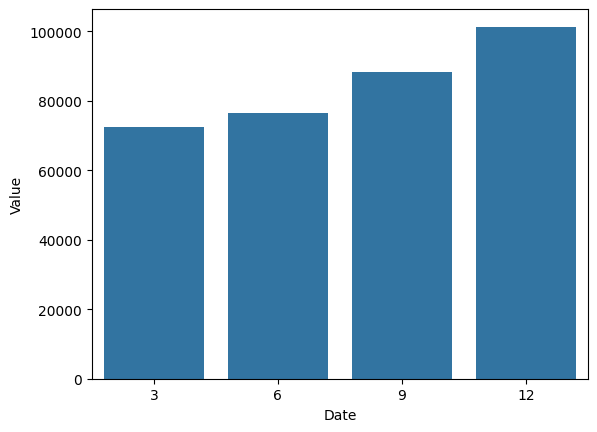

In [49]:
grouped_revenue_month = df_table.groupby(df_table["Date"].dt.month)["Value"].sum()
sns.barplot(grouped_revenue_month)